# Analysis

Trends Observed:
* a
* b
* c

Import dependencies

In [26]:
from citipy import citipy
#local config file with API key
import config
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
import requests as req
import seaborn as sns
sns.set()
rnd.seed(12456)

### Generate Cities List

Get random grid of 22*23 points in (latitude, longitude) 

Latitude range: -90, 90

Longitude range: -180, 180

In [37]:
cities = []
for i in range(22):
    for j in range(23):
        lat = rnd.uniform(-90, 90)
        lon = rnd.uniform(-180, 180)
        cities.append(citipy.nearest_city(lat, lon).city_name)

In [48]:
#debug
cities = cities[:5]
len(cities)

5

### Perform API Calls

In [84]:
API_KEY = config.API_KEY
latitudes_df = pd.DataFrame(columns=['Latitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed'])
for indx, city in enumerate(cities):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'
    try:
        response = req.get(url)
    except:
        print(f'Query: {url} failed!')
        continue
    if response.status_code != 200:
        print(f'City: {city} not found!')
        continue
    r_json = response.json()
    latitude = r_json['coord']['lat']
    temperature = r_json['main']['temp'] 
    humidity = r_json['main']['humidity']
    cloudiness = r_json['clouds']['all']
    wind_speed = r_json['wind']['speed']
    latitudes_df.loc[indx, 'Latitude'] = latitude
    latitudes_df.loc[indx, 'Temperature'] = temperature
    latitudes_df.loc[indx, 'Humidity'] = humidity
    latitudes_df.loc[indx, 'Cloudiness'] = cloudiness
    latitudes_df.loc[indx, 'Wind Speed'] = wind_speed    

City: illoqqortoormiut not found!


In [85]:
latitudes_df.head()

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
1,54.12,246.693,45,0,2.11
2,21.39,299.42,65,90,5.1
3,68.75,251.443,76,48,1.26
4,39.73,260.768,48,20,0.71


### Latitude vs Temperature Plot

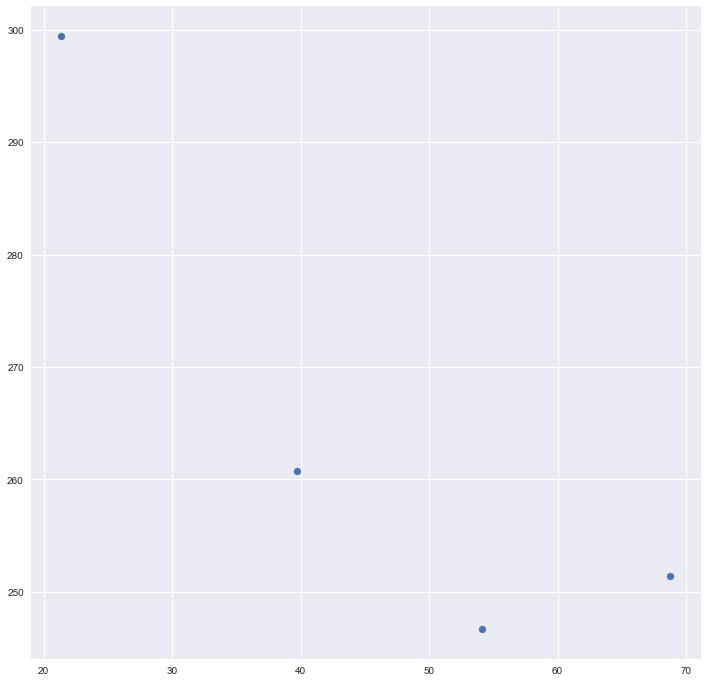

In [87]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(latitudes_df['Latitude'], latitudes_df['Temperature'])

### Latitude vs Humidity Plot

### Latitude vs Cloudiness Plot

### Latitude vs Wind Speed Plot